In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import splitfolders
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
input_dataset = r'Classification'


In [4]:
output = r'Fruits Procesed'

In [5]:
img_height,img_width = (224,224)
batch_size = 256
train_data_dir = r'Fruits Procesed\train'
test_data_dir = r'Fruits Procesed\test'
valid_data_dir = r'Fruits Procesed\val'


In [6]:
splitfolders.ratio(input_dataset,output,seed=101,ratio = (0.7,0.15,0.15))


Copying files: 10864 files [01:17, 140.42 files/s]


In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.4)
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical',subset= 'training')
valid_generator = train_datagen.flow_from_directory(valid_data_dir,target_size=(img_height,img_width),batch_size=batch_size,class_mode='categorical',subset= 'validation')
test_generator = train_datagen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),batch_size = 1,class_mode='categorical',subset= 'validation')
x,y = test_generator.next()
#from the train test and validation data using the imagedatagenerator, traingeneratot,validgenerator,testgenerator are obtained in batches


Found 4564 images belonging to 6 classes.
Found 648 images belonging to 6 classes.
Found 652 images belonging to 6 classes.


In [8]:
from tensorflow.keras.layers import Dropout
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs = base_model.input,outputs = predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
#history = model.fit(train_generator,epochs = 20,validation_data=valid_generator,callbacks = [early_stop])
history = model.fit(train_generator,epochs = 10,validation_data=valid_generator)


Epoch 1/10
18/18 [==============================] - 380s 21s/step - loss: 1.9756 - accuracy: 0.5868 - val_loss: 0.6466 - val_accuracy: 0.8380
Epoch 2/10
18/18 [==============================] - 350s 19s/step - loss: 0.1935 - accuracy: 0.9411 - val_loss: 0.2185 - val_accuracy: 0.9383
Epoch 3/10
18/18 [==============================] - 349s 19s/step - loss: 0.1034 - accuracy: 0.9664 - val_loss: 0.1671 - val_accuracy: 0.9444
Epoch 4/10
18/18 [==============================] - 350s 19s/step - loss: 0.0703 - accuracy: 0.9776 - val_loss: 0.1766 - val_accuracy: 0.9506
Epoch 5/10
18/18 [==============================] - 341s 19s/step - loss: 0.0606 - accuracy: 0.9759 - val_loss: 0.1790 - val_accuracy: 0.9475
Epoch 6/10
18/18 [==============================] - 345s 19s/step - loss: 0.0596 - accuracy: 0.9775 - val_loss: 0.1609 - val_accuracy: 0.9583
Epoch 7/10
18/18 [==============================] - 337s 19s/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.1507 - val_accuracy: 0.9568
Epoch 

652/652 - 64s - loss: 0.1532 - accuracy: 0.9632


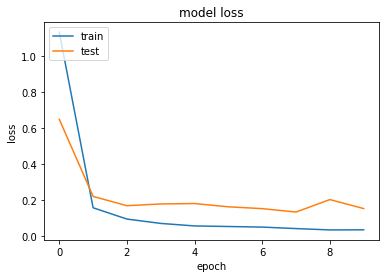

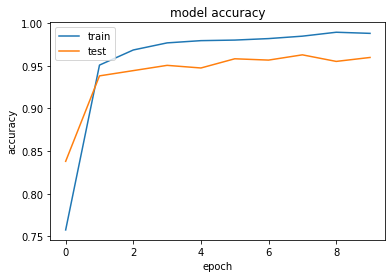

In [9]:
test_loss,test_acc = model.evaluate(test_generator,verbose=2)
models.save_model(model,'Final Model.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
#confusion matrix shows performance based on test data
file_names = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
#y= []
y_act = []
test_generator.reset()
for i in range(0,nb_samples):
    X_test,Y_test = test_generator.next()
    #y.append(model.predict(np.expand_dims(img_to_array(load_img(test_generator.filepaths[0],target_size=(224,224))),axis=0)))
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)


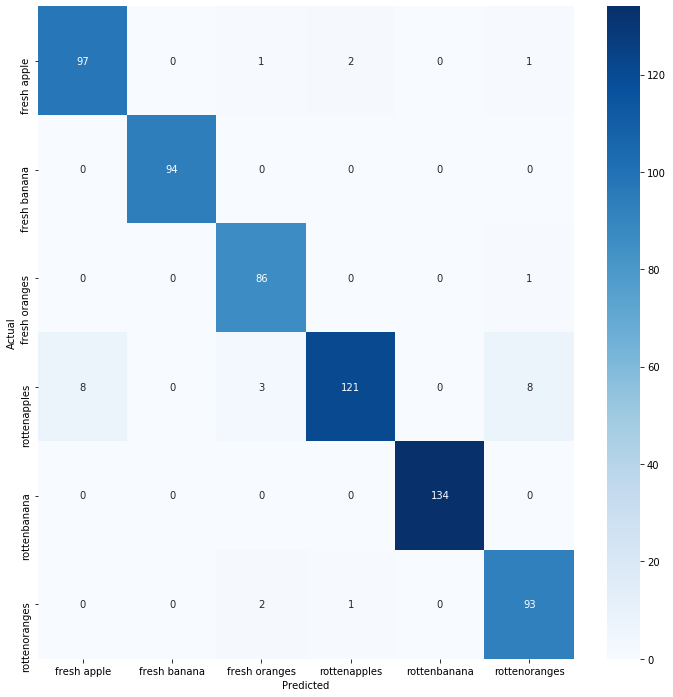

In [11]:
#transfer learning
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]
out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['Predicted','Actual'])
confusion_matrix = pd.crosstab(out_df['Actual'],out_df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')


In [12]:
#import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import datasets,layers,models
from PIL import Image,ImageOps
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3
import tensorflow
if False:
  encode_model = InceptionV3(weights='imagenet') #converts image to matrix
  encode_model = Model(encode_model.input, encode_model.layers[-2].output)
  WIDTH = 299
  HEIGHT = 299
  OUTPUT_DIM = 2048
  pi = \
    tensorflow.keras.applications.inception_v3.preprocess_input
else:
  encode_model = MobileNet(weights='imagenet',include_top=False)
  WIDTH = 224
  HEIGHT = 224
  OUTPUT_DIM = 50176
  pi = tensorflow.keras.applications.mobilenet.preprocess_input
  


In [13]:
list(test_generator.class_indices)


['fresh apple',
 'fresh banana',
 'fresh oranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [14]:
l = list(test_generator.class_indices)


In [15]:
def encodeImage(img):
      img = ImageOps.fit(img,(WIDTH,HEIGHT),Image.ANTIALIAS)
      x = tensorflow.keras.preprocessing.image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = pi(x)
      x = encode_model.predict(x) # Get the encoding vector for the image
      x = np.reshape(x, OUTPUT_DIM )
      return x


In [16]:
def import_predict(img,model):
        img = ImageOps.fit(img,(224,224),Image.ANTIALIAS)
        img = img_to_array(img)
        img = np.expand_dims(img,axis=0)
        img = preprocess_input(img)
        prediction = model.predict(img)
        return l[prediction.argmax()]


In [17]:
from PIL import Image
image = Image.open(r"3 (1).jpg")
encoded_image=encodeImage(image)
prediction = import_predict(img=image,model=model)


In [18]:
image.show()

In [19]:
print(prediction)

fresh apple


In [20]:
model.save("Final_ResNet.h5")

In [21]:
import os
# Get file size in bytes for a given model
os.stat("Final_ResNet.h5").st_size

120126208

In [22]:
from sklearn.metrics import accuracy_score
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
 

In [23]:
model=models.load_model('Final_ResNet.h5')


In [24]:
# Converting a tf.Keras model to a TensorFlow Lite model.
from tensorflow import lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Final_ResNet","wb").write(tflite_model)
# tf.lite.TFLiteConverter.from_saved_model()

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpgc8iyii6\assets


102383884

In [25]:
TF_LITE_MODEL_FILE_NAME = "Final_ResNet"

In [26]:
from sklearn.metrics import accuracy_score
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [27]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [28]:
TF_LITE_MODEL_FILE_NAME = "Final_ResNet"

In [29]:
#tflite model without quantization
# Converting a tf.Keras model to a TensorFlow Lite model.
from tensorflow import lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()
open("Final_ResNet","wb").write(tflite_model)
# tf.lite.TFLiteConverter.from_saved_model()

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplhtiuwb5\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplhtiuwb5\assets


102383884

In [30]:
#size of model without quantization
convert_bytes(get_file_size("Final_ResNet"), "MB")

File size: 97.641 Megabytes
